# 数字图像处理 第一次实验记录

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img2 = cv2.imread("2.png")

def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()


1 读取图像

In [2]:
rows,cols,chn = img2.shape
size = img2.size
print('image shape:', rows, cols, chn)
print('image size:', size)
print('image type:', img2.dtype)

image shape: 300 450 3
image size: 405000
image type: uint8


2 显示图像

In [3]:
# cv2.imshow('image', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

3 保存图像

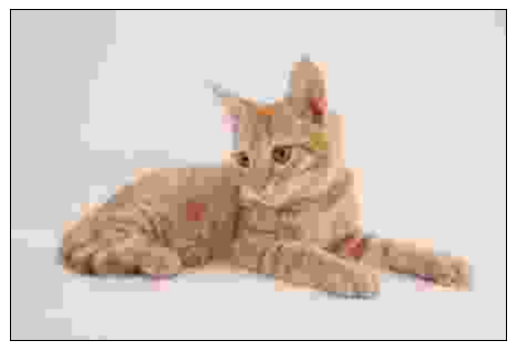

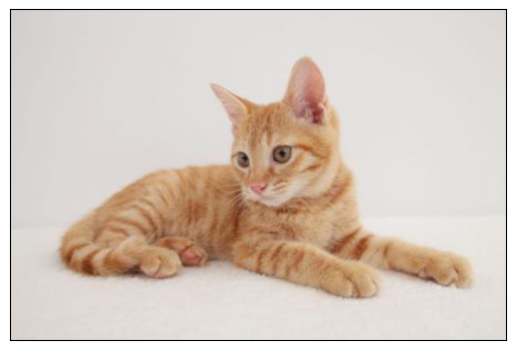

In [4]:
cv2.imwrite("2.save.jpg", img2, [int(cv2.IMWRITE_JPEG_QUALITY), 5])
cv2.imwrite("2.save.png", img2, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

show_img(cv2.imread("2.save.jpg"))
show_img(cv2.imread("2.save.png"))

4 图像像素存储形式

4.1 像素值获取

In [5]:
#获取和设置
pixel = img2[100,100] #[57 63 68],获取(100,100)处的像素值
print(pixel)
img2[100,100]=[57,63,99] #设置像素值
b = img2[100,100,0]#57, 获取(100,100)处，blue 通道像素值
g = img2[100,100,1]#63
r = img2[100,100,2]
img2[100,100,2]=99

#第 2 种方式获取和设置
piexl = img2.item(100,100,2)
img2.itemset((100,100,2),99)


[215 218 222]


4.2 ROI 截取（Range of Interest）

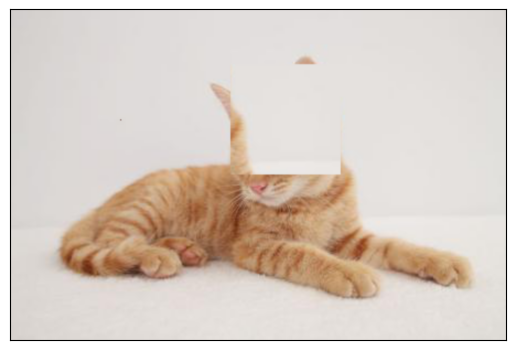

In [6]:
#ROI,Range of instrest
roi = img2[100:200,300:400] #截取 100 行到 200 行，列为 300 到 400 列的整块区域
img2[50:150,200:300] = roi
#将截取的 roi 移动到该区域 （50 到 150 行，200 到 300 列）
b = img2[:,:,0] #截取整个蓝色通道
b,g,r = cv2.split(img2) #截取三个通道，比较耗时
img2_solved = cv2.merge((b,g,r))
show_img(img2_solved)

4.3 拆分合并通道

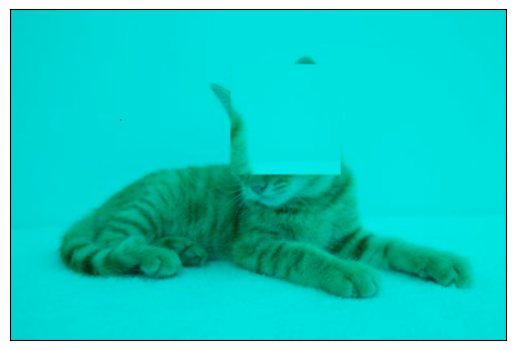

In [7]:
b,g,r = cv2.split(img2_solved)

img2_solved[:, :, 2] = 0
show_img(img2_solved)

4.5 Matplotlib 显示图像

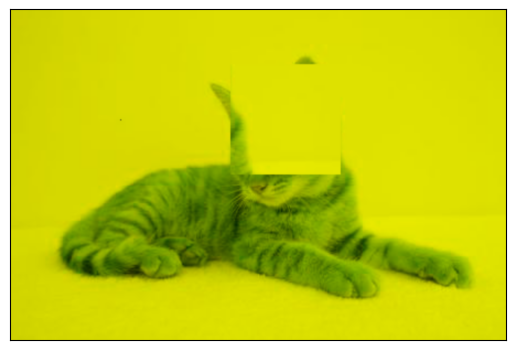

In [8]:
plt.imshow(img2_solved, cmap="gray", interpolation="bicubic")
plt.xticks([])
plt.yticks([])
plt.show()

4.6 按比例缩放

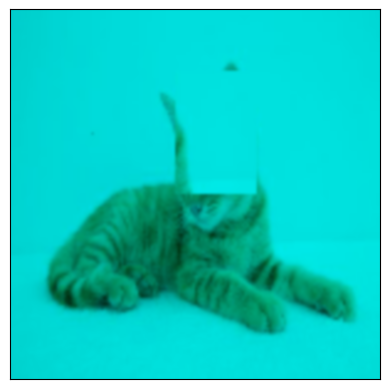

In [9]:
img2_solved = cv2.resize(img2_solved,(300,300)) #固定长宽
img2_solved = cv2.resize(img2_solved,None,fx=0.5,fy=0.5, interpolation=cv2.INTER_NEAREST) #固定比例, 最邻近插值
show_img(img2_solved)


思考1:编写利用 opencv 函数编写视频读取的程序

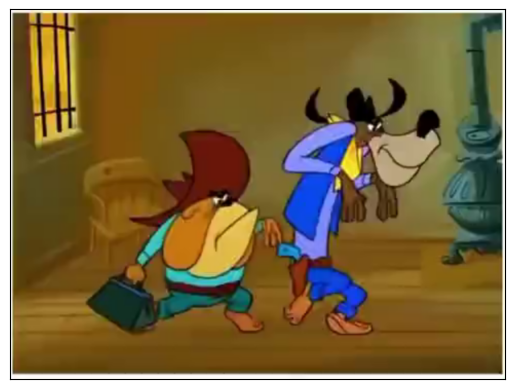

In [10]:
# 读入视频流
cap = cv2.VideoCapture('demo.mp4')
ret, frame = cap.read()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
plt.xticks([])
plt.yticks([])
plt.show()

cap.release()

思考2: 解决彩色图像 cv.show 和 plt.show 显示不一致的问题

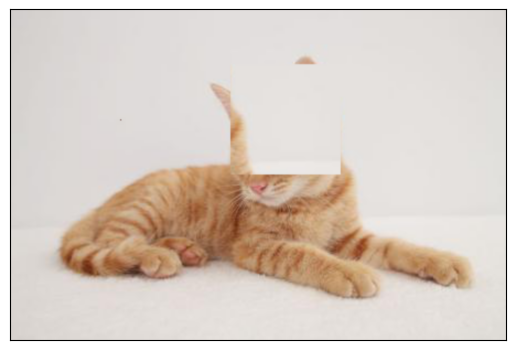

In [11]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
plt.xticks([])
plt.yticks([])
plt.show()

遇到的问题:
- 混入了中文逗号,报错,仔细检查后发现了问题
- 不会处理视频流,查阅网络,学习[这一篇文章](http://wiki.1zlab.com/wiki/python-opencv-tutorial/opencv-video-record-video-read/)后学会了